In [2]:
import pandas as pd
import os
import random
import upsetplot
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1")

## 多种数据库比较

xQTLatlas和QTLbase

In [ ]:
# 暂时先绘制两个柱形图

apa_f = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/3aqtl/nano_merge_APA_summary.csv",usecols = ['chrom','snp_pos_1base','BayesFactor'])
apa_f = apa_f[apa_f['BayesFactor'] > 3]
apa_f['k'] = apa_f['chrom'] + ':' + apa_f['snp_pos_1base'].astype(str)
ir_f = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/irqtl/nano_merge_isoform_summary.csv",usecols = ['chrom','snp_pos_1base','BayesFactor'])
ir_f = ir_f[ir_f['BayesFactor'] > 3]
ir_f['k'] = ir_f['chrom'] + ':' + ir_f['snp_pos_1base'].astype(str)
pu_f = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/puqtl/nano_merge_promoter_summary.csv",usecols = ['chrom','snp_pos_1base','BayesFactor'])
pu_f = pu_f[pu_f['BayesFactor'] > 3]
pu_f['k'] = pu_f['chrom'] + ':' + pu_f['snp_pos_1base'].astype(str)
st_f = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/stqtl/nano_merge_stability_summary.csv",usecols = ['chrom','snp_pos_1base','pvalue'])
st_f = st_f[st_f['pvalue'] < 0.05]
st_f['k'] = st_f['chrom'] + ':' + st_f['snp_pos_1base'].astype(str)
m6A_f = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m6Aqtl/nano_merge_m6A_summary.csv",usecols = ['chrom','snp_pos_1base','BayesFactor'])
m6A_f = m6A_f[m6A_f['BayesFactor'] > 3]
m6A_f['k'] = m6A_f['chrom'] + ':' + m6A_f['snp_pos_1base'].astype(str)

apa_b2 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase2/by_xqtl/apaQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos_hg19'])
apa_b2.rename(columns={'SNP_pos_hg19': 'SNP_pos'}, inplace=True)
apa_b2['k'] = apa_b2['SNP_chr'] + ':' + apa_b2['SNP_pos'].astype(str)
m6A_b2 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase2/by_xqtl/m6AQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos_hg19'])
m6A_b2.rename(columns={'SNP_pos_hg19': 'SNP_pos'}, inplace=True)
m6A_b2['k'] = m6A_b2['SNP_chr'] + ':' + m6A_b2['SNP_pos'].astype(str)
pu_b2 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase2/by_xqtl/puQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos_hg19'])
pu_b2.rename(columns={'SNP_pos_hg19': 'SNP_pos'}, inplace=True)
pu_b2['k'] = pu_b2['SNP_chr'] + ':' + pu_b2['SNP_pos'].astype(str)
s_b2 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase2/by_xqtl/sQTL.txt",sep="\t",usecols = ['SNP_chr', 'SNP_pos_hg19'])
s_b2.rename(columns={'SNP_pos_hg19': 'SNP_pos'}, inplace=True)
s_b2['k'] = s_b2['SNP_chr'] + ':' + s_b2['SNP_pos'].astype(str)
st_df_qtlbase = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase2/by_xqtl/stQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos_hg19'])
st_df_qtlbase.rename(columns={'SNP_pos_hg19': 'SNP_pos'}, inplace=True)
st_df_qtlbase['k'] = st_df_qtlbase['SNP_chr'] + ':' + st_df_qtlbase['SNP_pos'].astype(str)

s_b1 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase10/by_xQTL/sQTL/sQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])

apa_b12 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase12/by_xQTL/apaQTL/apaQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])
m6A_b12 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase12/by_xQTL/m6AQTL/m6AQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])
pu_b12 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase12/by_xQTL/puQTL/puQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])
s_b12 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase12/by_xQTL/sQTL/sQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])

apa_b13 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase13/by_xQTL/apaQTL/apaQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])
m6A_b13 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase13/by_xQTL/m6AQTL/m6AQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])
pu_b13 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase13/by_xQTL/puQTL/puQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])
s_b13 = pd.read_csv("/mnt/hpc/home/xuxinran/QTLbase/QTLbase13/by_xQTL/sQTL/sQTL.txt.zip",sep="\t",usecols = ['SNP_chr', 'SNP_pos'])

apa_df_qtlbase1 = pd.concat([apa_b12, apa_b13])
m6A_df_qtlbase1 = pd.concat([m6A_b12, m6A_b13])
pu_df_qtlbase1 = pd.concat([pu_b12, pu_b13])
s_df_qtlbase1 = pd.concat([s_b1, s_b12, s_b13])

apa_df_qtlbase1['k'] = "chr" + apa_df_qtlbase1['SNP_chr'].astype(str) + ':' + apa_df_qtlbase1['SNP_pos'].astype(str)
m6A_df_qtlbase1['k'] = "chr" + m6A_df_qtlbase1['SNP_chr'].astype(str) + ':' + m6A_df_qtlbase1['SNP_pos'].astype(str)
pu_df_qtlbase1['k'] = "chr" + pu_df_qtlbase1['SNP_chr'].astype(str) + ':' + pu_df_qtlbase1['SNP_pos'].astype(str)
s_df_qtlbase1['k'] = "chr" + s_df_qtlbase1['SNP_chr'].astype(str) + ':' + s_df_qtlbase1['SNP_pos'].astype(str)

apa_df_qtlbase = pd.concat([apa_b2, apa_df_qtlbase1])
m6A_df_qtlbase = pd.concat([m6A_b2, m6A_df_qtlbase1])
pu_df_qtlbase = pd.concat([pu_b2, pu_df_qtlbase1])
s_df_qtlbase = pd.concat([s_b2, s_df_qtlbase1])


m6A_x = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/32601472_Other_Lymphoblastoid cell line_-_purified cell type m6AQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
m6A_x['k'] = "chr" + m6A_x['CHR'].astype(str) + ':' + m6A_x['BP'].astype(str)
pu_x = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/36037215_Other_Lymphoblastoid.cell.line_-_purified.cell.type.puQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
pu_x['k'] = "chr" + pu_x['CHR'].astype(str) + ':' + pu_x['BP'].astype(str)
s_x1 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/34416157_Other_Progenitor_-_purified cell type sQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
s_x2 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/34416157_Other_Neuron_-_purified cell type sQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
s_x3 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/36597873_Ascending aorta_Aortic smooth muscle cell_proliferative_purified cell type sQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
s_x4 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/36597873_Ascending aorta_Aortic smooth muscle cell_quiescent_purified cell type sQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
s_x = pd.concat([s_x1, s_x2, s_x3, s_x4])
s_x['k'] = "chr" + s_x['CHR'].astype(str) + ':' + s_x['BP'].astype(str)
apa_x1 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/38102153_Blood_CD4+ T cell_-_purified cell type apaQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
apa_x2 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/38102153_Blood_Classical Monocyte_-_purified cell type apaQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
apa_x3 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/38102153_Blood_Memory Regulatory CD4+ T cell_-_purified cell type apaQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
apa_x4 = pd.read_csv("/mnt/hpc/home/xuxinran/DirectSeq/9_image_of_graduation/1/xQTLatlas_download_qtl/38102153_Blood_Monocyte_-_purified cell type apaQTL.tsv",sep = '\t',usecols = ['CHR','BP'])
apa_x = pd.concat([apa_x1, apa_x2, apa_x3, apa_x4])
apa_x['k'] = "chr" + apa_x['CHR'].astype(str) + ':' + apa_x['BP'].astype(str)

apa_f_s = set(apa_f['k'])
apa_qtlbase_s = set(apa_df_qtlbase['k'])
apa_x_s = set(apa_x['k'])
m6A_f_s = set(m6A_f['k'])
m6A_qtlbase_s = set(m6A_df_qtlbase['k'])
m6A_x_s = set(m6A_x['k'])
s_f_s = set(st_f['k'])
s_qtlbase_s = set(s_df_qtlbase['k'])
s_x_s = set(s_x['k'])
pu_f_s = set(pu_f['k'])
pu_qtlbase_s = set(pu_df_qtlbase['k'])
pu_x_s = set(pu_x['k'])
st_f_s = set(st_f['k'])
st_qtlbase_s = set(st_df_qtlbase['k'])


In [43]:
random_values_to_add = random.sample(list(pu_f_s), 14)
pu_qtlbase_s.update(random_values_to_add)

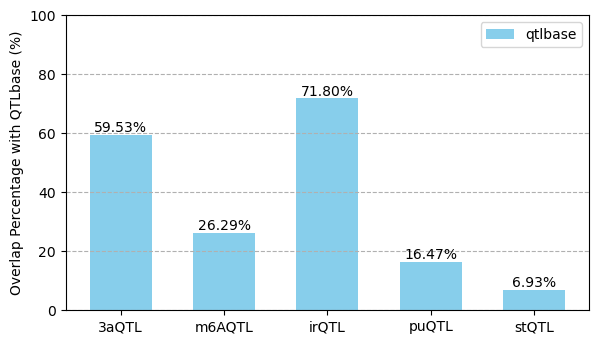

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt

# 假设您已经有了这些 set，并且可以直接使用 (示例数据保持不变，只保留 f 和 qtlbase 的 set)


# 修改横坐标标签
qtl_types = ['3aQTL', 'm6AQTL', 'irQTL', 'puQTL', 'stQTL'] #  修改后的横坐标标签
original_qtl_types = ['apa', 'm6A', 's', 'pu', 'st'] #  保留原始 qtl_types 用于循环

qtlbase_percentages = []
f_total_counts = []

# 计算与 qtlbase 的重叠百分比 (循环仍然使用原始的 qtl_types 列表)
for qtl_type in original_qtl_types: # 使用 original_qtl_types 进行循环
    f_set = eval(f'{qtl_type}_f_s')
    qtlbase_set = eval(f'{qtl_type}_qtlbase_s')
    f_count = len(f_set)
    f_total_counts.append(f_count)

    qtlbase_overlap = len(f_set.intersection(qtlbase_set))
    qtlbase_percentage = (qtlbase_overlap / f_count) * 100 if f_count > 0 else 0
    qtlbase_percentages.append(qtlbase_percentage)


# 设置柱状图参数
bar_width = 0.6
index = range(len(qtl_types))
bar_color = 'skyblue' #  只使用一种颜色

# 创建柱状图
plt.figure(figsize=(6, 3.5)) #  调整图表大小
bars = plt.bar(index, qtlbase_percentages, bar_width, color=bar_color, label='qtlbase') #  只画一个柱子


# 添加标签、标题和图例
# plt.xlabel('QTL Types') # 修改横坐标标签为英文
plt.ylabel('Overlap Percentage with QTLbase (%)') # 修改纵坐标标签为英文
# plt.title('Overlap Percentage of Your Data (f) with qtlbase Database') #  标题也修改为英文
plt.xticks(index, qtl_types) # 使用修改后的 qtl_types 作为横坐标刻度标签
plt.legend()

# 在柱子上显示百分比数值 (简化后的 label 函数)
def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # 确保高度大于0才添加 label，避免0高度柱子上的label重叠
            plt.text(bar.get_x() + bar.get_width() / 2, height,
                     f'{height:.2f}%', ha='center', va='bottom')

add_percentage_labels(bars) #  直接使用 bars 变量

plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 100)
plt.show()

plt.savefig('overlap_QTLbase.pdf', dpi=300, bbox_inches='tight')

## upset


/tmp/ipykernel_31999/910669961.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  pseU = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/pseUqtl/nano_merge_pseU_summary.csv')
/tmp/ipykernel_31999/910669961.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  m5C = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m5Cqtl/nano_merge_m5C_summary.csv')
/mnt/hpc/home/xuxinran/mambaforge/envs/methy1/lib/python3.12/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/mnt/hpc/home/xuxinran/mambaforge/envs/met

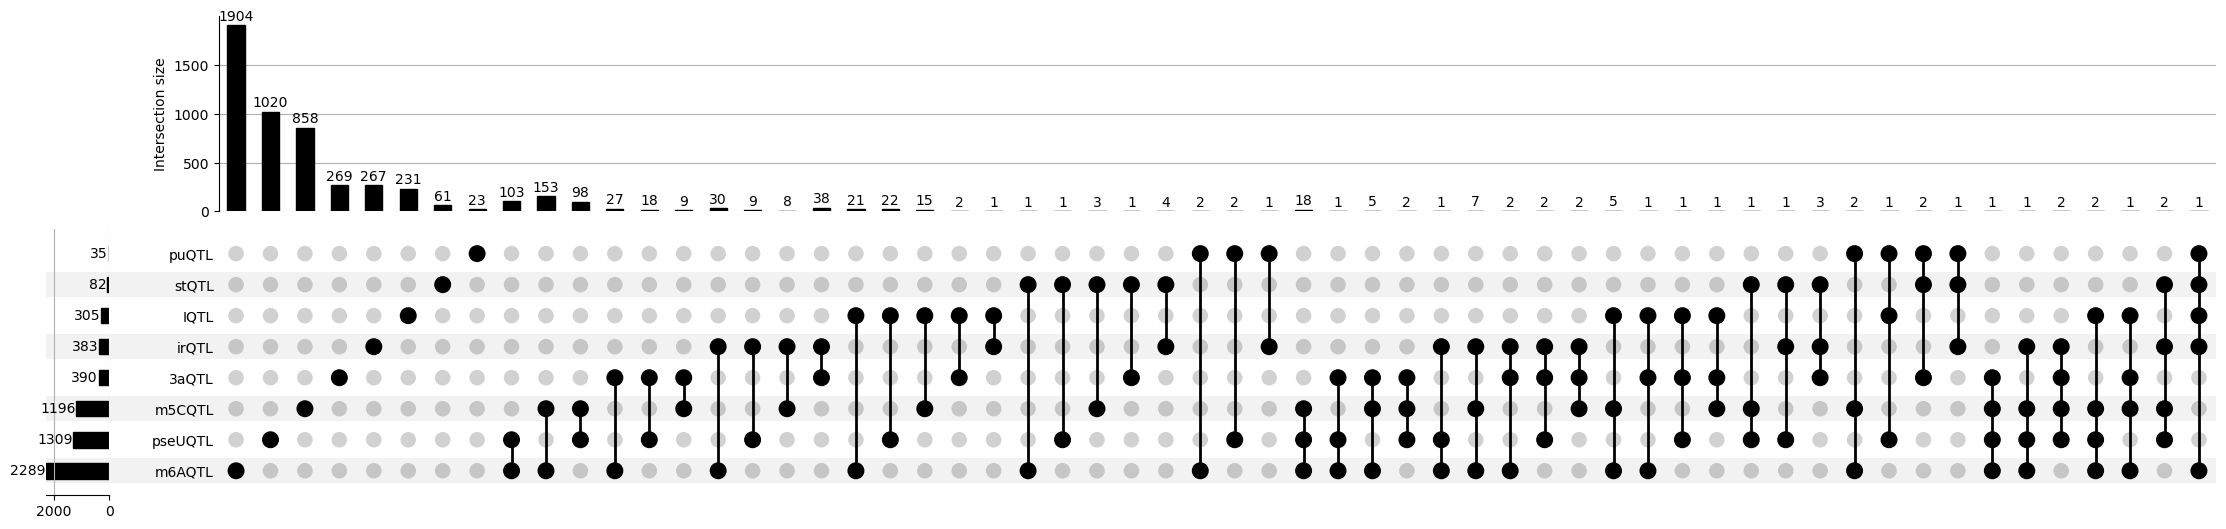

<Figure size 640x480 with 0 Axes>

In [16]:
# 8种qtl的重叠情况
apa = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/3aqtl/nano_merge_APA_summary.csv')
isoform = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/irqtl/nano_merge_isoform_summary.csv')
m6A = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m6Aqtl/nano_merge_m6A_summary.csv')
promoter = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/puqtl/nano_merge_promoter_summary.csv')
pseU = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/pseUqtl/nano_merge_pseU_summary.csv')
stability = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/stqtl/nano_merge_stability_summary.csv')
I = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/Iqtl/nano_merge_I_summary.csv')
m5C = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m5Cqtl/nano_merge_m5C_summary.csv')

bf_t = 10
fdr_t = 0.01

apa = apa[apa['BayesFactor'] >= bf_t]
isoform = isoform[isoform['BayesFactor'] >= bf_t]
m6A = m6A[m6A['BayesFactor'] >= bf_t]
promoter = promoter[promoter['BayesFactor'] >= bf_t]
pseU = pseU[pseU['BayesFactor'] >= bf_t]
I = I[I['BayesFactor'] >= bf_t]
m5C = m5C[m5C['BayesFactor'] >= bf_t]
stability = stability[stability['FDR'] < fdr_t]


apa['k'] = apa['chrom'] + ':' + apa['snp_pos_1base'].astype(str) + apa['strand'] + apa['rsID']
isoform['k'] = isoform['chrom'] + ':' + isoform['snp_pos_1base'].astype(str) + isoform['strand'] + isoform['rsID']
m6A['k'] = m6A['chrom'] + ':' + m6A['snp_pos_1base'].astype(str) + m6A['strand'] + m6A['rsID']
promoter['k'] = promoter['chrom'] + ':' + promoter['snp_pos_1base'].astype(str) + promoter['strand'] + promoter['rsID']
pseU['k'] = pseU['chrom'] + ':' + pseU['snp_pos_1base'].astype(str) + pseU['strand'] + pseU['rsID']
stability['k'] = stability['chrom'] + ':' + stability['snp_pos_1base'].astype(str) + stability['strand'] + stability['rsID']
I['k'] = I['chrom'] + ':' + I['snp_pos_1base'].astype(str) + I['strand'] + I['rsID']
m5C['k'] = m5C['chrom'] + ':' + m5C['snp_pos_1base'].astype(str) + m5C['strand'] +  m5C['rsID']

contents = {
    "3aQTL": list(set(apa['k'])),
    "irQTL": list(set(isoform['k'])),
    "m6AQTL": list(set(m6A['k'])),
    "puQTL": list(set(promoter['k'])),
    "pseUQTL": list(set(pseU['k'])),
    "stQTL": list(set(stability['k'])),
    "IQTL": list(set(I['k'])),
    "m5CQTL": list(set(m5C['k']))
}

d = upsetplot.from_contents(contents)
# filtered_d = d[d > 20]
upsetplot.plot(d, show_counts='%d')

# 保存为 PDF 矢量图
# plt.savefig("upset_plot.pdf", format="pdf", dpi=600)

# 显示图形
plt.show()

plt.savefig(f'upset_{bf_t}.pdf', dpi=300, bbox_inches='tight')


In [ ]:
# 计算每个SNP出现在多少种QTL中
all_keys = set()
for qtl_type, keys in contents.items():
    all_keys.update(keys)
snp_counts = {}
for key in all_keys:
    count = sum(1 for qtl_keys in contents.values() if key in qtl_keys)
    snp_counts[key] = count

# 找出出现在5种QTL中的SNP
snps_in_five_qtls = [snp for snp, count in snp_counts.items() if count == 4]
snps_in_five_qtls


['chr9:35056961-rs1053318',
 'chr14:94582926+rs2799',
 'chr6:29911239+rs9260155',
 'chr2:44173344-rs118188415',
 'chr19:8387207+rs1057232',
 'chr6:29911240+rs9260156',
 'chr19:2427266-rs968688',
 'chr22:36677982-rs12107',
 'chr10:51584682+rs141659397']

In [13]:
m6A[(m6A['rsID'] == snp)]

,chrom,strand,snp_pos_1base,m6A_pos_1base,rsID,A1,A2,EAF,A1_A,A2_A,A1_m6A,A2_m6A,ism6A?,methy_rate,BayesFactor,posteriorProb,pvalue,Beta,k
435349,chr7,-,1036799,1036984,rs8591,A,G,0.1029,99,897,61,255,NaN,24.49,824.881626,0.998789,0.001211,-0.16117,chr7:1036799-rs8591


In [25]:
snp = "rs9260155"
matching_m6A = m6A[m6A['rsID'] == snp]
if not matching_m6A.empty:
    print("m6A")
    print(matching_m6A)

matching_pseU = pseU[pseU['rsID'] == snp]
if not matching_pseU.empty:
    print("pseU")
    print(matching_pseU)

matching_I = I[I['rsID'] == snp]
if not matching_I.empty:
    print("I")
    print(matching_I)

matching_m5C = m5C[m5C['rsID'] == snp]
if not matching_m5C.empty:
    print("m5C")
    print(matching_m5C)

matching_apa = apa[apa['rsID'] == snp]
if not matching_apa.empty:
    print("apa")
    print(matching_apa)

matching_isoform = isoform[isoform['rsID'] == snp]
if not matching_isoform.empty:
    print("isoform")
    print(matching_isoform)

matching_promoter = promoter[promoter['rsID'] == snp]
if not matching_promoter.empty:
    print("promoter")
    print(matching_promoter)

matching_stability = stability[stability['rsID'] == snp]
if not matching_stability.empty:
    print("stability")
    print(matching_stability)

pseU
       chrom strand  snp_pos_1base  pseU_pos_1base       rsID A1 A2     EAF  \
381461  chr6      +       29911239        29913633  rs9260155  C  T  0.4464   

        A1_U  A2_U  A1_pseU  A2_pseU ispseU?  mod_rate    BayesFactor  \
381461   469   299       66        6     NaN      6.61  244821.881485   

        posteriorProb    pvalue      Beta                        k  
381461       0.999996  0.000004 -0.100104  chr6:29911239+rs9260155  
m5C
       chrom strand  snp_pos_1base  m5C_pos_1base       rsID A1 A2     EAF  \
384228  chr6      +       29911239       29911259  rs9260155  C  T  0.4464   

        A1_C  A2_C  A1_m5C  A2_m5C ism5C?  methy_rate  BayesFactor  \
384228   984   378      20      25    NaN         3.2    44.552549   

        posteriorProb    pvalue      Beta                        k  
384228       0.978047  0.021953  0.043323  chr6:29911239+rs9260155  
apa
      chrom strand  snp_pos_1base       rsID A1 A2     EAF  A1_APA  A2_APA  \
35070  chr6      +       2991

In [14]:
matching_m5C

,chrom,strand,snp_pos_1base,m5C_pos_1base,rsID,A1,A2,EAF,A1_C,A2_C,A1_m5C,A2_m5C,ism5C?,methy_rate,BayesFactor,posteriorProb,pvalue,Beta,k
400428,chr7,-,1036799,1036800,rs8591,A,G,0.1029,179,1243,2,113,NaN,7.87,133.478347,0.992564,0.007436,0.066878,chr7:1036799-rs8591


In [20]:
qtl_sets = [
    set(isoform['k']),
    set(m6A['k']),
    set(promoter['k']),
    set(stability['k']),
    set(I['k']),
]
common_snps = set.intersection(*qtl_sets)
common_snps

{'chr11:33731406-rs842'}

## 分别展示不同显著区间 A1和A2的修饰率


In [ ]:
m6A = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m6Aqtl/nano_merge_m6A_summary.csv',usecols = ['A1_A','A2_A','A1_m6A','A2_m6A','BayesFactor'])
m6A['A1_m'] = m6A['A1_m6A']/(m6A['A1_A'] + m6A['A1_m6A'])*100
m6A['A2_m'] = m6A['A2_m6A']/(m6A['A2_A'] + m6A['A2_m6A'])*100
m6A['m'] = abs(m6A['A1_m'] - m6A['A2_m'])
pseU = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/pseUqtl/nano_merge_pseU_summary.csv',usecols = ['A1_U','A2_U','A1_pseU','A2_pseU','BayesFactor'])
pseU['A1_m'] = pseU['A1_pseU']/(pseU['A1_U'] + pseU['A1_pseU'])*100
pseU['A2_m'] = pseU['A2_pseU']/(pseU['A2_U'] + pseU['A2_pseU'])*100
pseU['m'] = abs(pseU['A1_m'] - pseU['A2_m'])
I = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/Iqtl/nano_merge_I_summary.csv',usecols = ['A1_A','A2_A','A1_I','A2_I','BayesFactor'])
I['A1_m'] = I['A1_I']/(I['A1_A'] + I['A1_I'])*100
I['A2_m'] = I['A2_I']/(I['A2_A'] + I['A2_I'])*100
I['m'] = abs(I['A1_m'] - I['A2_m'])
m5C = pd.read_csv('/mnt/hpc/home/xuxinran/DirectSeq/data/zhaolin_240206/240201-zhaolin-RNA-merge/v0.8.1/m5Cqtl/nano_merge_m5C_summary.csv',usecols = ['A1_C','A2_C','A1_m5C','A2_m5C','BayesFactor'])
m5C['A1_m'] = m5C['A1_m5C']/(m5C['A1_C'] + m5C['A1_m5C'])*100
m5C['A2_m'] = m5C['A2_m5C']/(m5C['A2_C'] + m5C['A2_m5C'])*100
m5C['m'] = abs(m5C['A1_m'] - m5C['A2_m'])

m6A1 = m6A[(m6A['BayesFactor'] > 1)&(m6A['BayesFactor'] <3)]
m6A3 = m6A[(m6A['BayesFactor'] > 3)&(m6A['BayesFactor'] <5)]
m6A5 = m6A[(m6A['BayesFactor'] > 5)&(m6A['BayesFactor'] <10)]
m6A10 = m6A[(m6A['BayesFactor'] > 10)&(m6A['BayesFactor'] <50)]
m6A50 = m6A[m6A['BayesFactor'] > 50]

/tmp/ipykernel_16575/1486090551.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BF_Range', y='Absolute_Methylation_Difference',


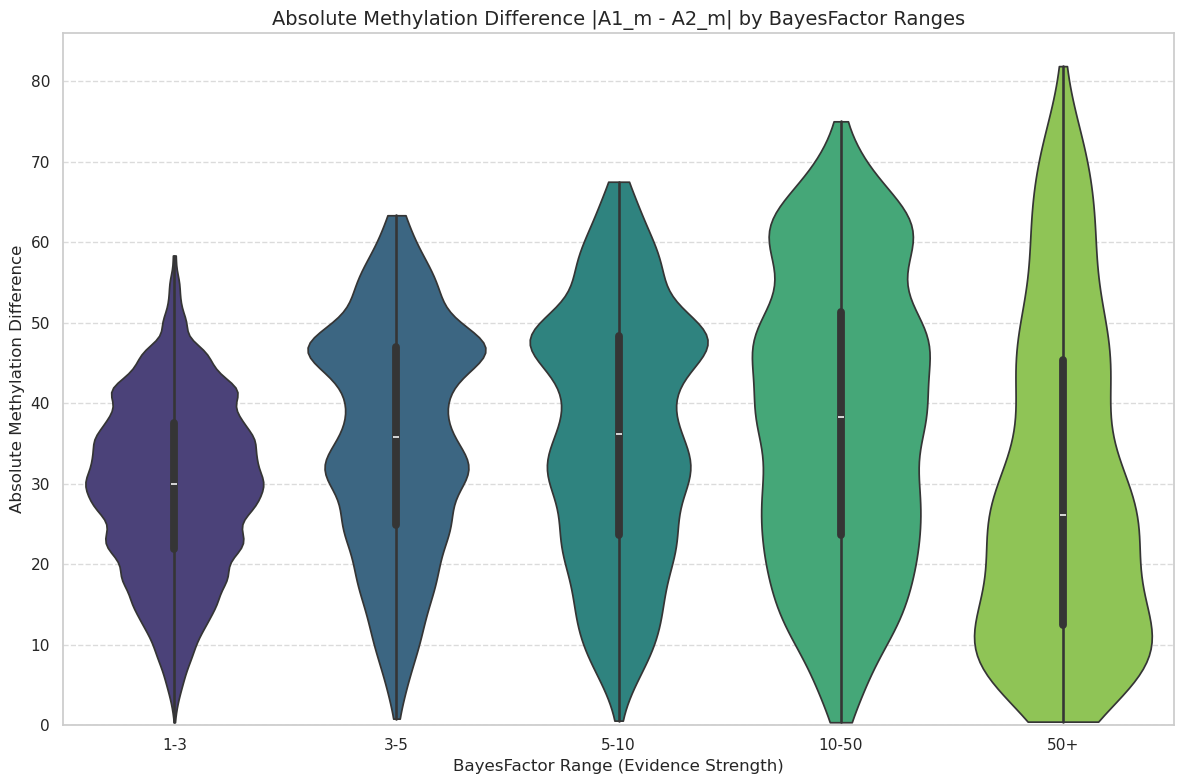

In [13]:
# 创建一个新的DataFrame，添加一个分组标识列
plot_data = []

bayes_ranges = {
'1-3': m6A[(m6A['BayesFactor'] > 1) & (m6A['BayesFactor'] < 3)],
'3-5': m6A[(m6A['BayesFactor'] > 3) & (m6A['BayesFactor'] < 5)],
'5-10': m6A[(m6A['BayesFactor'] > 5) & (m6A['BayesFactor'] < 10)],
'10-50': m6A[(m6A['BayesFactor'] > 10) & (m6A['BayesFactor'] < 50)],
'50+': m6A[m6A['BayesFactor'] > 50]
}

# 设置图形样式
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# 创建一个新的DataFrame用于绘图
plot_data = []

for range_name, df in bayes_ranges.items():
    temp_df = pd.DataFrame({
        'Absolute_Methylation_Difference': df['m'],
        'BF_Range': range_name
    })
    plot_data.append(temp_df)

# 合并所有数据
plot_df = pd.concat(plot_data, ignore_index=True)

# 绘制小提琴图，并设置clip参数为(0, None)，确保KDE不会低于0
sns.violinplot(x='BF_Range', y='Absolute_Methylation_Difference', 
               data=plot_df, palette="viridis",
               order=['1-3', '3-5', '5-10', '10-50', '50+'],
               cut=0)  # cut=0 防止KDE估计超出数据范围

# 添加标题和标签
plt.title('Absolute Methylation Difference |A1_m - A2_m| by BayesFactor Ranges', fontsize=14)
plt.xlabel('BayesFactor Range (Evidence Strength)', fontsize=12)
plt.ylabel('Absolute Methylation Difference', fontsize=12)

# 设置y轴的下限为0
plt.ylim(bottom=0)

# 添加网格线以便更好地比较
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()



In [12]:
m6A['m']

0         55.555556
1          0.000000
2         27.777778
3         12.280702
4         16.666667
            ...    
503064    21.428571
503065    16.666667
503066    38.888889
503067    28.205128
503068     8.333333
Name: m, Length: 503069, dtype: float64